In [17]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

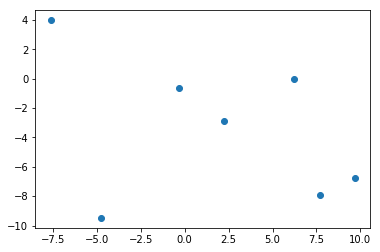

In [22]:
!pip3 install ACO-Pants
import pants
import math
import random
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt


nodes = []
n=7 #no. of cities
for i in range(n):
  x = random.uniform(-10, 10)
  y = random.uniform(-10, 10)
  nodes.append((x, y))
  
testList = nodes
testList2 = [(elem1, elem2) for elem1, elem2 in testList]
plt.scatter(*zip(*testList2))
plt.show()

Brute Force Solution

In [0]:
def euclidean(a, b):
    return math.sqrt(   (a[1] - b[1])**2 + (a[0] - b[0])**2  )

53.14815509324472
((6.200637354780195, -0.022037797034244022), (9.669683824490043, -6.7468702017967015), (7.712676202244971, -7.946663802403675), (-4.787981072923202, -9.468760149394553), (-7.6300792560987984, 3.954418561614137), (-0.3111717107277574, -0.657912264408191), (2.2118083220943756, -2.9216083310089296))


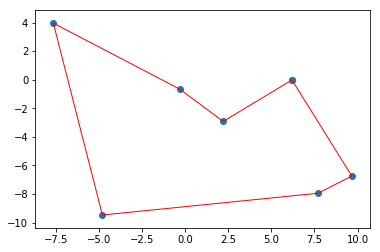

CPU times: user 303 ms, sys: 154 ms, total: 457 ms
Wall time: 289 ms


In [24]:
%%time
perm = permutations(nodes)
b = list(perm)

min = 99999
short = 0
for i in range(math.factorial(n)):
    dist=0
    for j in range(n):
        dist = dist + euclidean(b[i][j%n], b[i][(j+1)%n])
    if (dist < min):
        min = dist
        short = i
print(min)
print(b[short])

bf_path=[]
for i in range(n):
    bf_path.append(b[short][i])
bf_path.append(b[short][0])


testList = bf_path
testList2 = [(elem1, elem2) for elem1, elem2 in testList]
plt.plot(*zip(*testList2), 'r', lw=1)
plt.scatter(*zip(*testList2))
plt.show()

Ant Colony Optimization

53.14815509324472
[(-7.6300792560987984, 3.954418561614137), (-0.3111717107277574, -0.657912264408191), (2.2118083220943756, -2.9216083310089296), (6.200637354780195, -0.022037797034244022), (9.669683824490043, -6.7468702017967015), (7.712676202244971, -7.946663802403675), (-4.787981072923202, -9.468760149394553), (-7.6300792560987984, 3.954418561614137)]


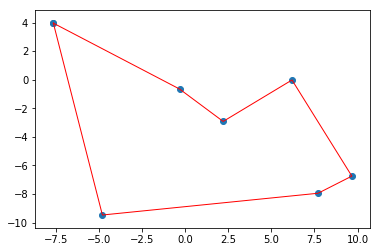

CPU times: user 320 ms, sys: 156 ms, total: 476 ms
Wall time: 297 ms


In [25]:
%%time
world = pants.World(nodes, euclidean)
solver = pants.Solver()
solution = solver.solve(world)

path=[]
for i in range(n):
    path.append(solution.tour[i])
path.append(solution.tour[0])

print(solution.distance)
print(path)

testList = path
testList2 = [(elem1, elem2) for elem1, elem2 in testList]
plt.plot(*zip(*testList2), 'r', lw=1)
plt.scatter(*zip(*testList2))
plt.show()


Comparison

In [30]:
import time

bf_arr=[]
aco_arr=[]

for n in range(3,10):
  
  nodes = []
  for i in range(n):
    x = random.uniform(-10, 10)
    y = random.uniform(-10, 10)
    nodes.append((x, y))

  testList = nodes

  
  t1 = time.time()
  perm = permutations(nodes)
  b = list(perm)

  min = 99999
  short = 0
  for i in range(math.factorial(n)):
      dist=0
      for j in range(n):
          dist = dist + euclidean(b[i][j%n], b[i][(j+1)%n])
      if (dist < min):
          min = dist
          short = i

  t2=time.time()
  r1 = t2-t1
  bf_arr.append(r1)
  
  
  t3 = time.time()
  world = pants.World(nodes, euclidean)
  solver = pants.Solver()
  solution = solver.solve(world)

  path=[]
  for i in range(n):
     path.append(solution.tour[i])
  path.append(solution.tour[0])
  t4 = time.time()
  r2 = t4-t3
  aco_arr.append(r2)
  
print(aco_arr)
print(bf_arr)




[0.02462291717529297, 0.028427839279174805, 0.03865933418273926, 0.048431396484375, 0.059183359146118164, 0.07349681854248047, 0.08530044555664062]
[0.03384208679199219, 0.0001308917999267578, 0.0005500316619873047, 0.003978729248046875, 0.03154945373535156, 0.2877461910247803, 2.951657295227051]


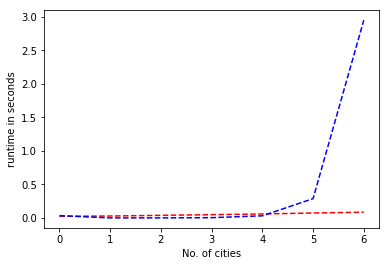

In [31]:
plt.plot(aco_arr, 'r--',  bf_arr, 'b--')
plt.xlabel("No. of cities")
plt.ylabel("runtime in seconds")
plt.show()